In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
netflix_df = pd.read_csv("./data/netflix_titles.csv")

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
netflix_df.shape

(6234, 12)

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [7]:
netflix_df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [8]:
netflix_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [9]:
netflix_df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,False,False,False,True,False,False,True,False,False,False,False,False
6230,False,False,False,True,False,False,True,False,False,False,False,False
6231,False,False,False,True,True,True,True,False,True,False,False,False
6232,False,False,False,True,False,False,True,False,False,False,False,False


In [10]:
netflix_df.isnull().values.any()

True

In [11]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
netflix_df.isnull().sum().sum()

3036

In [13]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

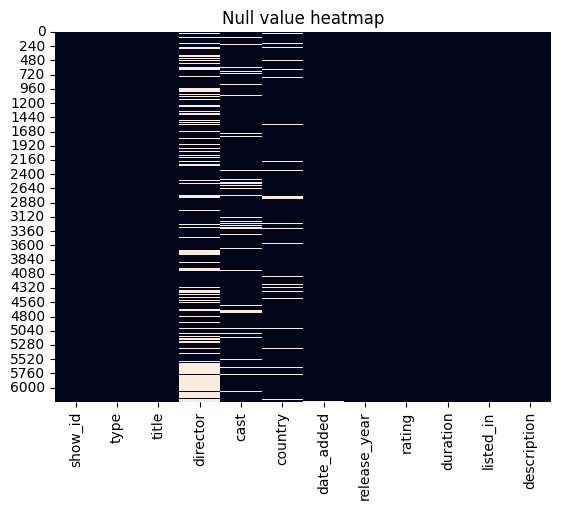

In [14]:
sns.heatmap(netflix_df.isnull() , cbar = False)
plt.title("Null value heatmap");

In [15]:
netflix_df["director"].fillna("No director" , inplace = True)

In [16]:
netflix_df['cast'].fillna("No cast" , inplace = True)

In [17]:
netflix_df['country'].fillna("Country unavailable" , inplace = True)

In [18]:
# help(netflix_df.dropna)
netflix_df.dropna(subset = ['date_added' , 'rating'] , inplace=True)

In [19]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [20]:
netflix_df.type.value_counts()

Movie      4257
TV Show    1957
Name: type, dtype: int64

In [21]:
netflix_movies_df = netflix_df[netflix_df["type"] == 'Movie'].copy()

In [22]:
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [23]:
netflix_movies_df.shape

(4257, 12)

In [24]:
netflix_tv_df = netflix_df[netflix_df.type == "TV Show"].copy()

In [25]:
netflix_tv_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,No director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No director,No cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",Country unavailable,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


In [26]:
netflix_tv_df.shape

(1957, 12)

In [27]:
netflix_movies_df.duration = netflix_movies_df.duration.str.replace(' min' , '').astype('int')

In [28]:
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [29]:
netflix_tv_df.rename(columns={'duration' : 'seasons'} , inplace = True)

In [30]:
# help( netflix_tv_df.rename)

In [31]:
netflix_tv_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
2,70234439,TV Show,Transformers Prime,No director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No director,No cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",Country unavailable,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


In [32]:
netflix_tv_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True) 

In [33]:
netflix_tv_df.seasons = netflix_tv_df.seasons.str.replace(' Seasons','').astype(int)

In [34]:
netflix_tv_df.sample(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
5601,80131479,TV Show,Terrace House: Aloha State,No director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...","United States, Japan","September 26, 2017",2017,TV-14,4,"International TV Shows, Reality TV",The beautiful island of Oahu is host to a new ...
5511,80122234,TV Show,Bh Se Bhade,No director,"Deven Bhojani, Suchita Trivedi, Sarita Joshi, ...",India,"April 1, 2018",2013,TV-PG,1,"International TV Shows, TV Comedies",A kind-hearted insurance agent has the mysteri...
5350,80237428,TV Show,La Piloto,No director,"Livia Brito, Juan Eduardo Colucho, Arap Bethke...",Mexico,"April 2, 2018",2017,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...","Dreaming her whole life of becoming a pilot, Y..."
5680,70235760,TV Show,My Babysitter's a Vampire,No director,"Matthew Knight, Vanessa Morgan, Atticus Mitche...",Canada,"October 17, 2018",2012,TV-PG,2,"Kids' TV, TV Comedies","Ethan, Benny and fledgling vampire Sarah battl..."
6056,80215507,TV Show,Velvet Colección,No director,"Marta Hazas, Asier Etxeandía, Adrián Lastra, D...",Spain,"February 14, 2019",2018,TV-14,2,"International TV Shows, Romantic TV Shows, Spa...","In the late '60s, fashion designer Ana enlists..."
2796,80102160,TV Show,Stories by Rabindranath Tagore,Anurag Basu,No cast,India,"July 5, 2018",2015,TV-14,1,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...
6025,80020971,TV Show,Huntik: Secrets and Seekers,No director,"Yuri Lowenthal, Drew Aaron, Karen Strassman, M...","United States, Italy","January 1, 2018",2011,TV-Y7,2,Kids' TV,A high school student searching for his missin...


# EDA

In [87]:
# netflix_df
# sns.countplot(netflix_df['type'])

# netflix_df['type'] = netflix_df['type'].astype(str)

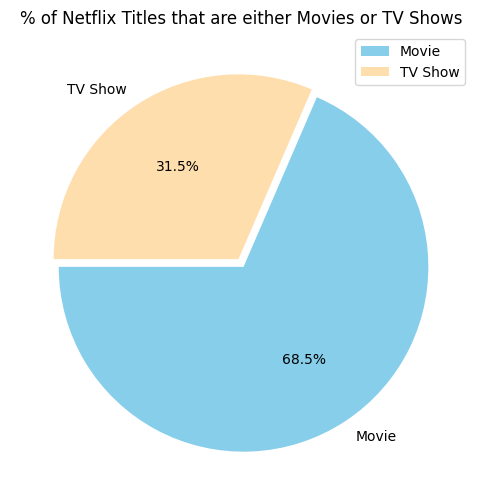

In [88]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

In [89]:
order = netflix_df['rating'].unique().astype(str)
order

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', 'UR', 'NC-17'], dtype='<U8')

In [95]:
netflix_df['year_added'] = pd.DatetimeIndex(netflix_df['date_added']).year
netflix_df['month_added'] = pd.DatetimeIndex(netflix_df['date_added']).month

In [96]:
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month

In [97]:
netflix_tv_df['year_added'] = pd.DatetimeIndex(netflix_tv_df['date_added']).year
netflix_tv_df['month_added'] = pd.DatetimeIndex(netflix_tv_df['date_added']).month

In [125]:
netflix_year = netflix_df.year_added.value_counts().to_frame().reset_index().rename(columns={'index':'year' , 'year_added' : 'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

,year,count
0,2019,2349
1,2018,1781
2,2017,1297
3,2016,453
5,2015,88
6,2014,25
7,2011,13
8,2013,12
9,2012,7
10,2009,2


In [126]:
netflix_year2 = netflix_df[['type' , 'year_added']]

In [109]:
netflix_year2

,type,year_added
0,Movie,2019
1,Movie,2016
2,TV Show,2018
3,TV Show,2018
4,Movie,2017
...,...,...
6218,TV Show,2019
6219,TV Show,2019
6220,TV Show,2016
6221,TV Show,2016


In [127]:
movie_year = netflix_year2[netflix_year2.type == "Movie"].year_added.value_counts().to_frame().reset_index().rename(columns={'index':'year' , 'year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
movie_year

,year,count
0,2019,1546
1,2018,1290
2,2017,910
3,2016,262
5,2015,56
6,2014,19
7,2011,13
8,2013,6
9,2012,4
10,2009,2


In [134]:
show_year = netflix_year2[netflix_year2.type == 'TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns= {'index':'year' , 'year_added' : 'count'})
show_year = show_year[show_year.year != 2020]
show_year

,year,count
0,2019,803
1,2018,491
2,2017,387
3,2016,191
5,2015,32
6,2013,6
7,2014,6
8,2012,3
9,2008,1


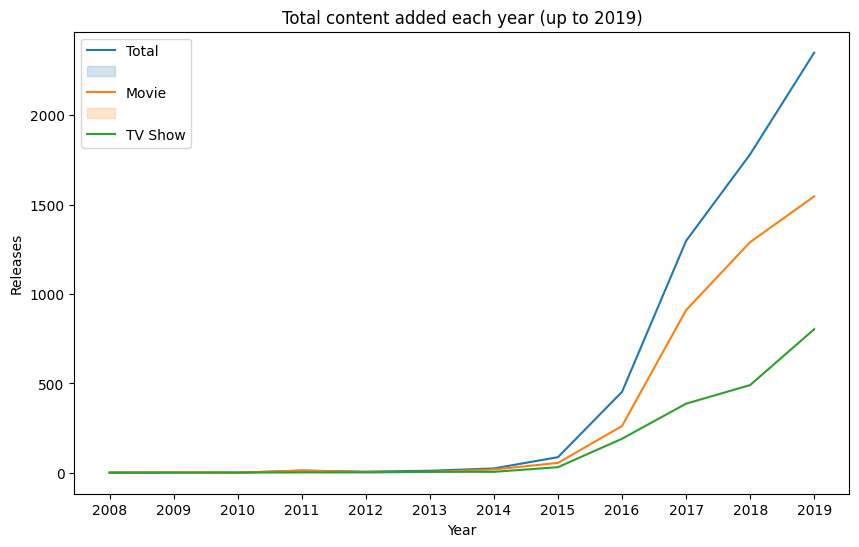

In [167]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','','Movie','','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()